In [5]:
%load_ext autoreload
%autoreload 2
from utils import utils, sbrnet_utils

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
psf_path = "/projectnb/tianlabdl/jalido/sbrnet/data/cm2v2/z_uninterpolated_PSF.tif"
PSF = utils.normalize_psf_power(utils.linear_normalize(utils.read_tiff(psf_path)))
print(PSF.shape)

gt_path = "/projectnb/tianlabdl/jalido/sbrnet/data/datap5vasc/gt_vol_0.tiff"
gt = utils.uint8_to_float(utils.read_tiff(gt_path))
print("gt", gt.shape)

(24, 2076, 3088)
gt (24, 512, 512)


In [7]:
meas = utils.lsi_fwd_mdl(utils.pad_3d_array_to_size(gt,psf.shape), psf)

0.9999999999999997


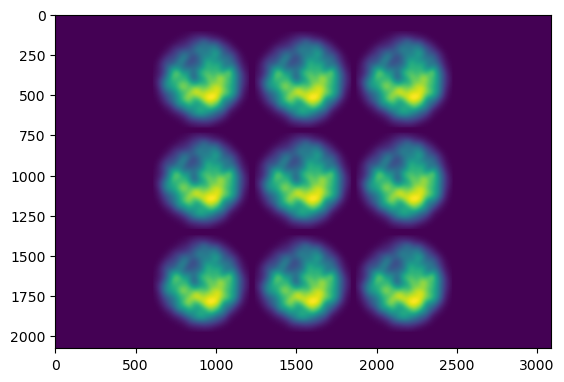

In [13]:
LENS_AP = utils.full_read("/projectnb/tianlabdl/jalido/sbrnet/data/cm2v2/lensletapodize.tiff")
MLA_AP = utils.full_read("/projectnb/tianlabdl/jalido/sbrnet/data/cm2v2/mlaapodize.tiff")
value = utils.full_read("/projectnb/tianlabdl/jalido/sbrnet/data/valuenoise/value_1.png")
bgmask = sbrnet_utils.make_bg_mask(value, lens_ap, mla_ap)

plt.imshow(bgmask)
print(bgmask.max())

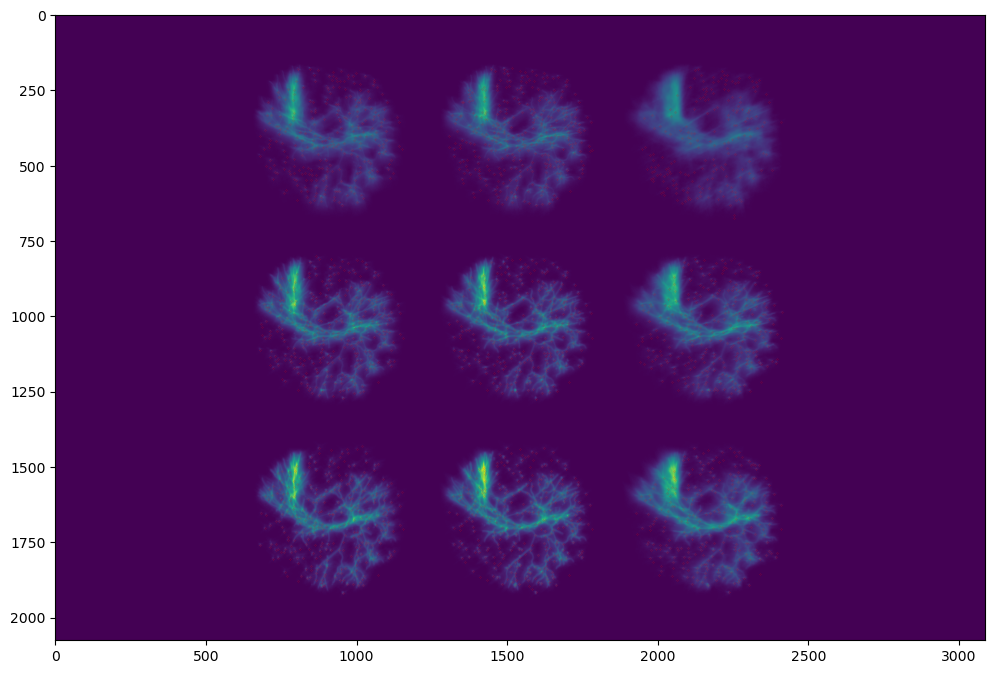

In [31]:
image_max = maximum_filter(meas, size=20, mode='constant')
fixed_meas = meas.copy()
fixed_meas[meas<=0.01] = 0
# Comparison between image_max and im to find the coordinates of local maxima
coordinates = peak_local_max(fixed_meas, min_distance=5)


plt.figure(figsize=(12,12))
plt.imshow(meas)
for i in range(coordinates.shape[0]):
    plt.plot(coordinates[i,1], coordinates[i,0], 'ro', markersize=.1)
plt.show()

-1.2890985927791887e-08


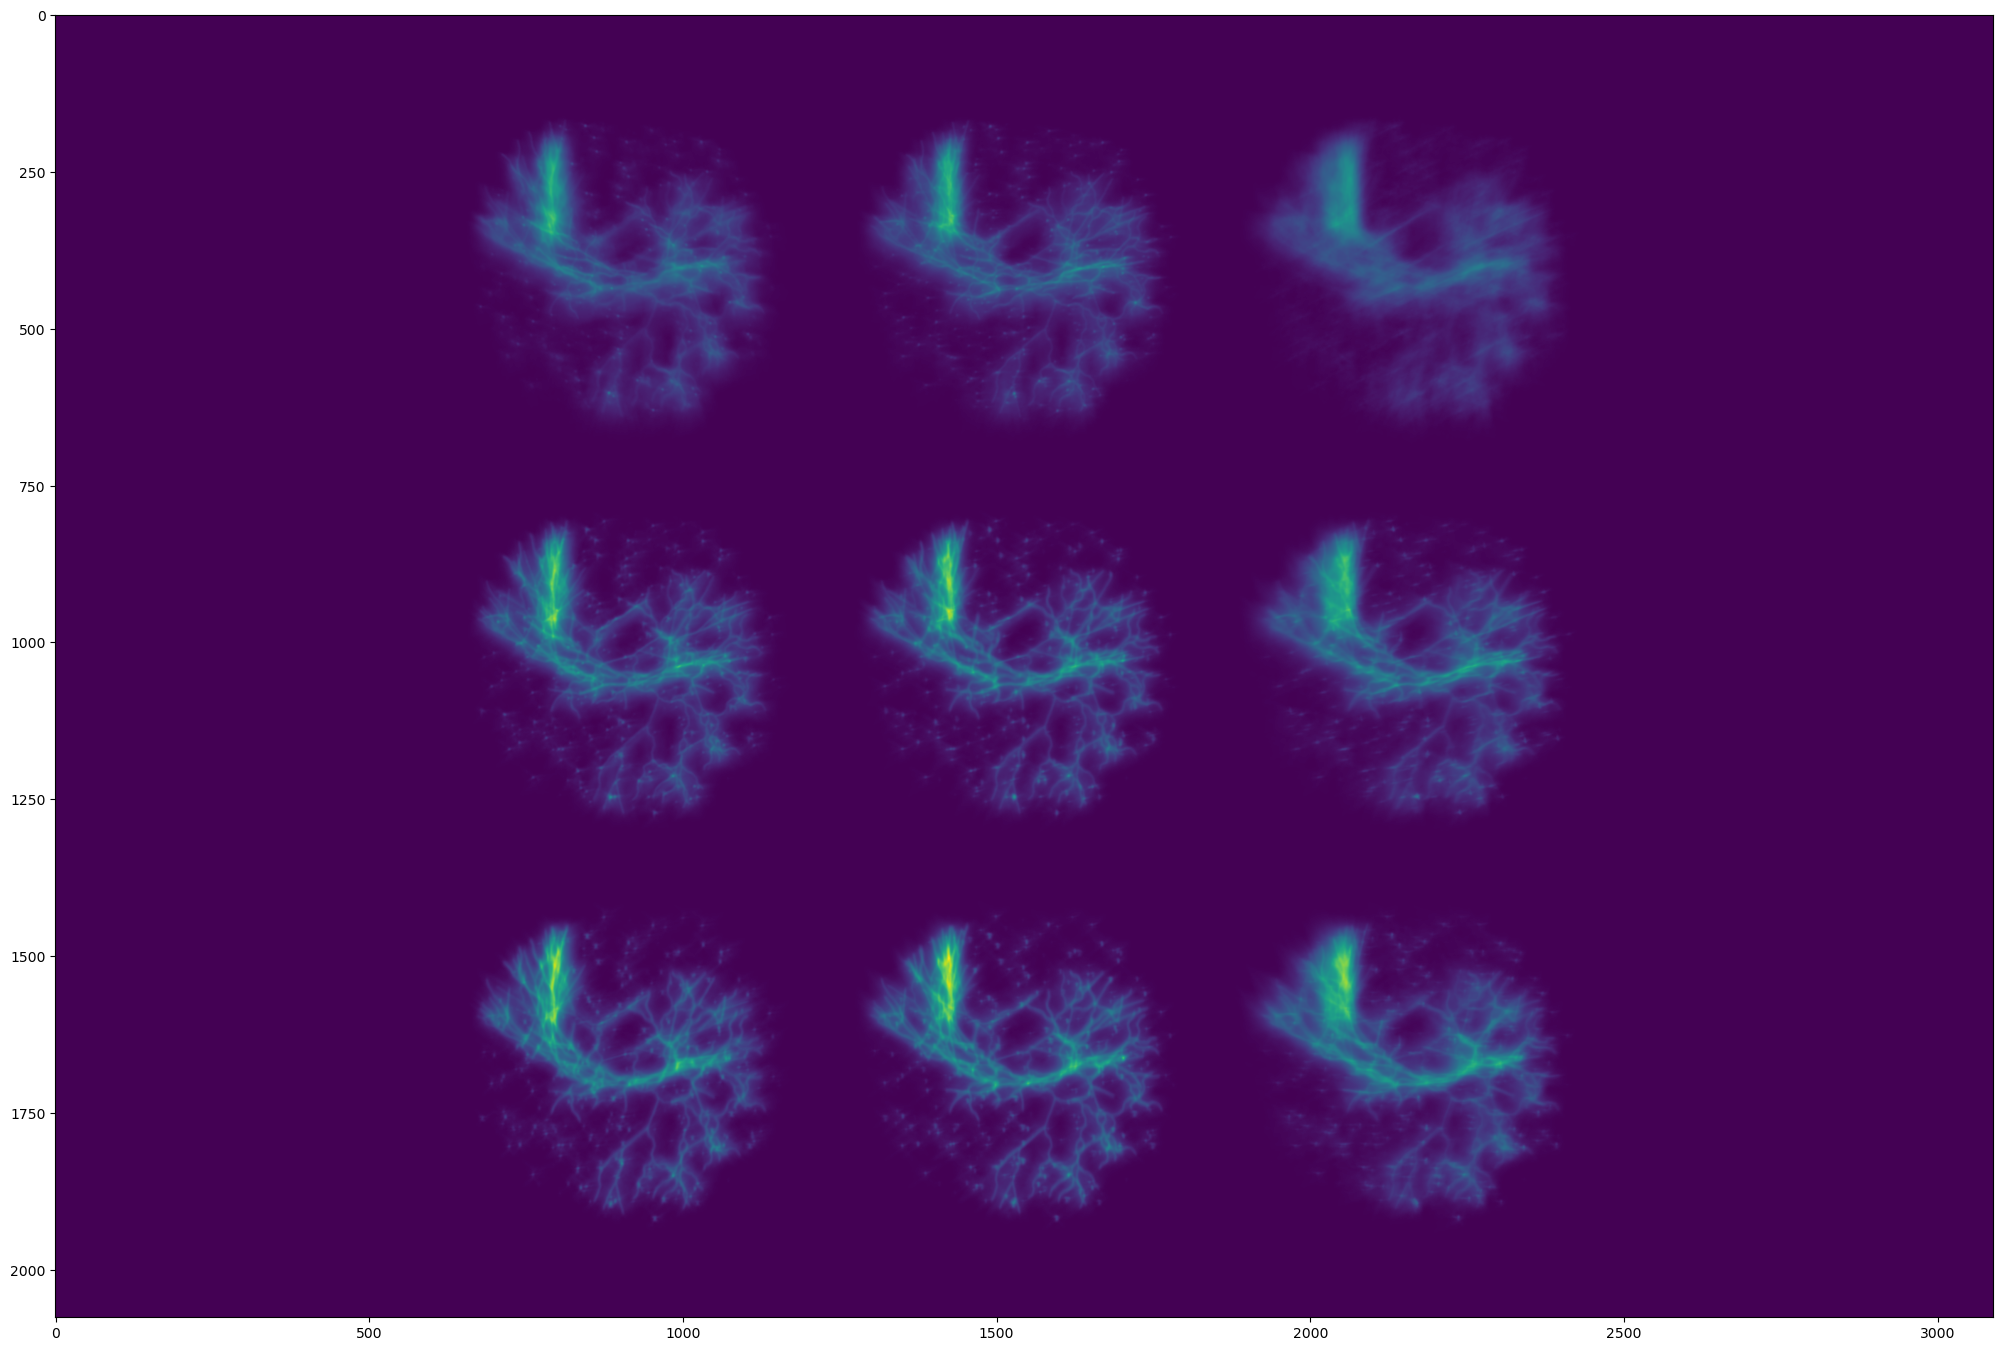

In [8]:
plt.figure(figsize=(25,25))
plt.imshow(meas)
print(meas.min())


In [24]:
FOCUS_LOC = np.array([[406, 909],
                     [407, 1545],
                     [405, 2175],

                     [1037, 911],
                     [1037, 1544],
                     [1037, 2176],

                     [1675, 911],
                     [1675, 1543],
                     [1675, 2173]])


(9, 2)

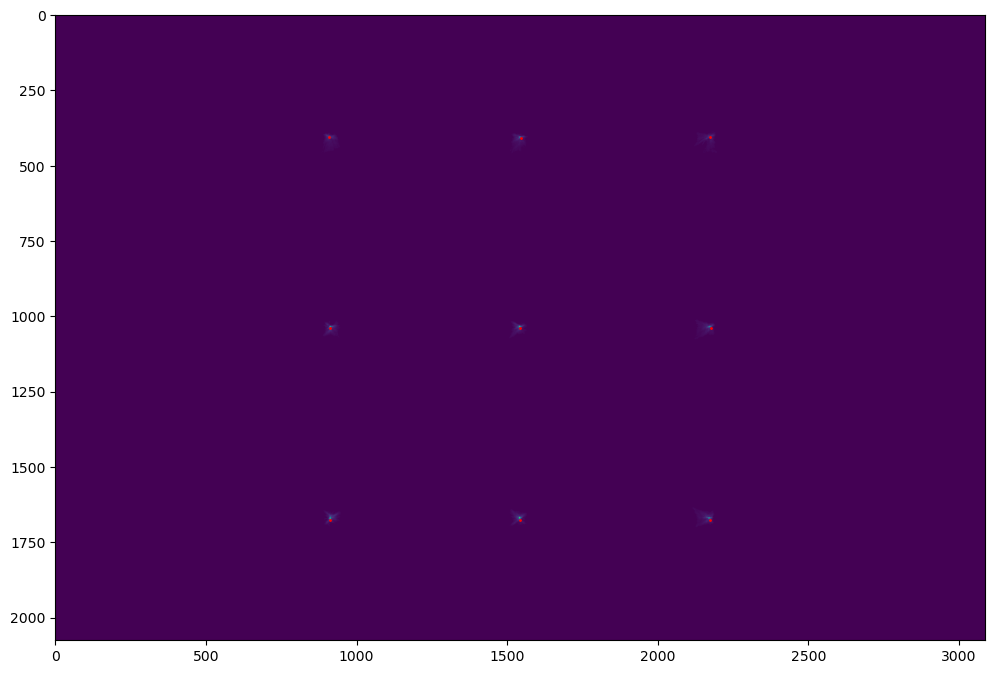

In [28]:
plt.figure(figsize=(12,12))
plt.imshow(psf[13,:,:])
for i in range(9):
    plt.plot(FOCUS_LOC[i,1], FOCUS_LOC[i,0], 'ro', markersize=1)
plt.show()

In [3]:
psf_path = "/projectnb/tianlabdl/jalido/sbrnet/data/cm2v2/z_uninterpolated_PSF.tif"
psf = utils.normalize_psf_power(utils.linear_normalize(utils.read_tiff(psf_path)))
print(psf.shape)

gt_path = "/projectnb/tianlabdl/jalido/sbrnet/data/vasc_beads/gt_vol_496.tiff"
gt = utils.linear_normalize(utils.read_tiff(gt_path))
print("gt", gt.shape)

meas = utils.lsi_fwd_mdl(utils.pad_3d_array_to_size(gt,psf.shape), psf)





(24, 2076, 3088)
gt (24, 512, 512)


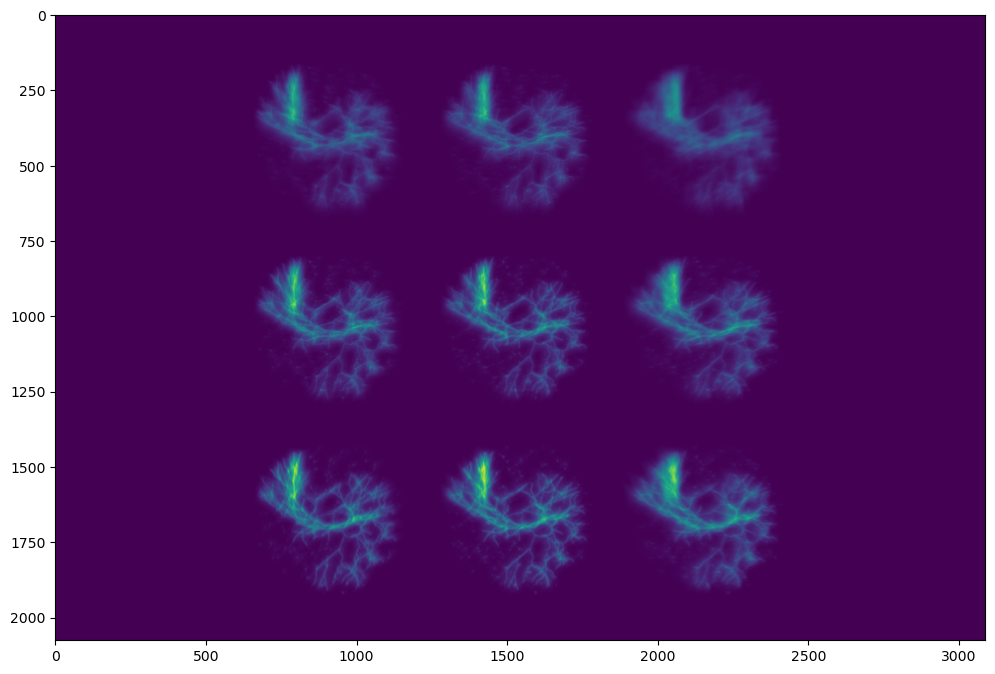

In [4]:
plt.figure(figsize=(12,12))
plt.imshow(meas)

In [7]:
vasc_path = "/projectnb/tianlabdl/jalido/synthetic_vasculature/16um_diameter/"
bead_path = "/projectnb/tianlabdl/jalido/synthetic_vasculature/beads/"
out_path = "/projectnb/tianlabdl/jalido/sbrnet/data/"


In [13]:
for i in range(500):
    beads = linear_normalize(tifffile.imread(bead_path + "sim_gt_vol_" + str(i) + ".tif"))
    vasc = linear_normalize(tifffile.imread(vasc_path + "Lnet_i_" + str(i) + ".tiff"))
    gt = linear_normalize(beads + vasc)
    write_tiff(gt,out_path+f"gt_vol_{i}.tiff")